In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector 

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Sivasai@0808',
    database='Ecommerce'
)

cur = db.cursor()







# List all cities where customers are located

In [5]:
query = """ select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

df=pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [9]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)=2017"""

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017",data[0][0]

('total orders placed in 2017', 45101)

 # Find the total sales per category.

In [12]:
query = """select upper(products.product_category) category,round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

data
df=pd.DataFrame(data, columns=['Category','Sales'])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43



# Calculate the percentage of orders that were paid in installments

In [15]:
query = """select (sum(case when payment_installments>= 1 then 1 
else 0 end))/count(*)*100 from payments
"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were bought in installments is ",data[0][0]

('the percentage of orders that were bought in installments is ',
 Decimal('99.9981'))

# Count the number of customers from each state. 


In [77]:
query = """select customer_state,count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df=pd.DataFrame(data,columns=['State','Number of Customers'])
df=df.sort_values(by ='Number of Customers', ascending=False)
df

,State,Number of Customers
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045
1,SC,3637
9,BA,3380
13,DF,2140
8,ES,2033
7,GO,2020


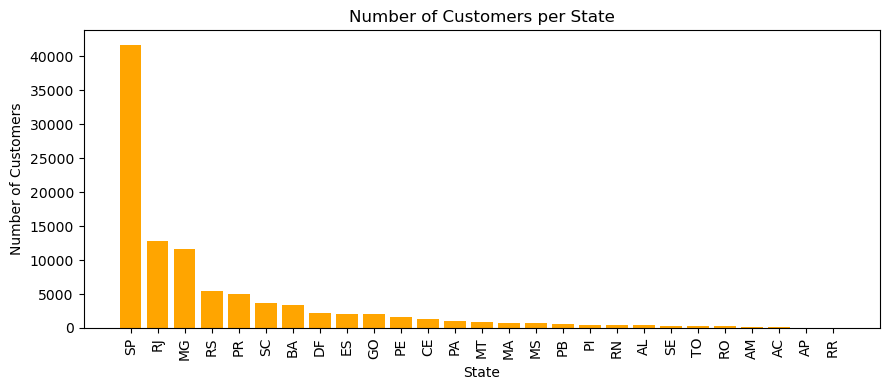

In [87]:
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()  # Clean column names

plt.figure(figsize=(9, 4))
plt.bar(df['State'], df['Number of Customers'],color='Orange')
plt.xticks(rotation=90)
plt.title("Number of Customers per State")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


# Top States WRT to Number of customers


In [94]:
top5 = df.head(5)
top5

,State,Number of Customers
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045


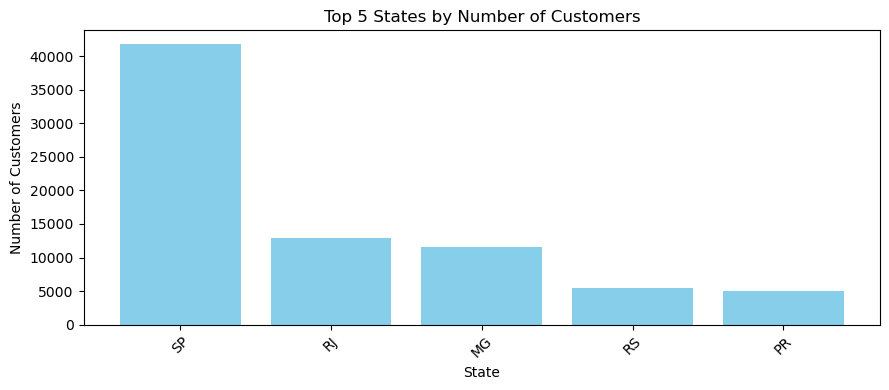

In [96]:
import matplotlib.pyplot as plt

top5 = df.sort_values(by='Number of Customers', ascending=False).head(5)

plt.figure(figsize=(9, 4))
plt.bar(top5['State'], top5['Number of Customers'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 5 States by Number of Customers")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


# Calculate the number of orders per month in 2018.


In [61]:
query = """select monthname(order_purchase_timestamp)months,count(order_id) order_count
from orders where year(order_purchase_timestamp)=2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
data
df=pd.DataFrame(data,columns=['months','order_count'])
df

,months,order_count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


[Text(0, 0, '7269'),
 Text(0, 0, '6728'),
 Text(0, 0, '7211'),
 Text(0, 0, '6939'),
 Text(0, 0, '6873'),
 Text(0, 0, '6167'),
 Text(0, 0, '6292'),
 Text(0, 0, '6512'),
 Text(0, 0, '16'),
 Text(0, 0, '4')]

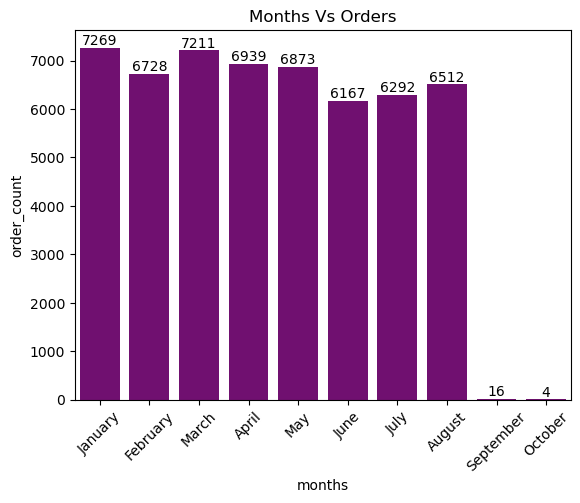

In [71]:
o=['January','February','March','April','May','June','July','August','September','October']
ax= sns.barplot(x=df['months'],y=df['order_count'],data=df,order=o,color='purple')
plt.xticks(rotation =45)
plt.title('Months Vs Orders')
ax.bar_label(ax.containers[0])#For showing the number of order above every bar



# Find the average number of products per order, grouped by customer city.

In [25]:
query = """
WITH count_per_order AS (
    SELECT 
        orders.order_id,
        orders.customer_id, 
        COUNT(order_items.order_id) AS oc
    FROM 
        orders 
    JOIN 
        order_items ON orders.order_id = order_items.order_id
    GROUP BY 
        orders.order_id, orders.customer_id
)

SELECT 
    customers.customer_city,
    AVG(count_per_order.oc) AS average_orders
FROM 
    customers 
JOIN 
    count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY 
    customers.customer_city
ORDER BY 
    average_orders desc;
"""





cur.execute(query)

data = cur.fetchall()
df=pd.DataFrame(data,columns=['customer_city','orders'])
df.head(10)

,customer_city,orders
0,padre carvalho,7.0000
1,celso ramos,6.5000
2,datas,6.0000
3,candido godoi,6.0000
4,matias olimpio,5.0000
5,cidelandia,4.0000
6,picarra,4.0000
7,morro de sao paulo,4.0000
8,teixeira soares,4.0000
9,curralinho,4.0000


# Calculate the percentage of total revenue contributed by each product category

In [28]:
query = """select upper(products.product_category) category,
round((sum(payments.payment_value)/ (select sum(payment_value) from payments ))*100,2) sales_percentage
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category order by sales_percentage desc;
"""

cur.execute(query)

data = cur.fetchall()

data

[('BED TABLE BATH', 10.7),
 ('HEALTH BEAUTY', 10.35),
 ('COMPUTER ACCESSORIES', 9.9),
 ('FURNITURE DECORATION', 8.93),
 ('WATCHES PRESENT', 8.93),
 ('SPORT LEISURE', 8.7),
 ('HOUSEWARES', 6.84),
 ('AUTOMOTIVE', 5.32),
 ('GARDEN TOOLS', 5.24),
 ('COOL STUFF', 4.87),
 ('FURNITURE OFFICE', 4.04),
 ('TOYS', 3.87),
 ('BABIES', 3.37),
 ('PERFUMERY', 3.17),
 ('TELEPHONY', 3.04),
 ('STATIONARY STORE', 1.98),
 ('PET SHOP', 1.94),
 ('PCS', 1.74),
 ('ELECTRONICS', 1.62),
 (None, 1.58),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 1.51),
 ('MUSICAL INSTRUMENTS', 1.46),
 ('ELECTROSTILE', 1.41),
 ('FASHION BAGS AND ACCESSORIES', 1.36),
 ('FIXED TELEPHONY', 1.29),
 ('GAMES CONSOLES', 1.22),
 ('BAGS ACCESSORIES', 1.17),
 ('CASA CONSTRUCAO', 0.85),
 ('ROOM FURNITURE', 0.85),
 ('ELECTRICES 2', 0.78),
 ('AGRO INDUSTRIA E COMERCIO', 0.74),
 ('HOME APPLIANCES', 0.6),
 ('CLIMATIZATION', 0.57),
 ('HOUSE COMFORT', 0.53),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 0.47),
 ('DRINKS', 0.45),
 ('CONSTRUCTION T

In [30]:
df=pd.DataFrame(data,columns=['Catgeory','Percentage'])
df.head(10)

,Catgeory,Percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


# Identify the correlation between product price and the number of times a product has been purchased.

In [33]:
query = """select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id =order_items.product_id
group by products.product_category;
"""

cur.execute(query)

data = cur.fetchall()
df=pd.DataFrame(data,columns=['Catgeory','order_count','price'])

arr1=df["order_count"]
arr2=df["price"]
a =np.corrcoef([arr1,arr2])
print('The correlation between price and number of times has been purchased is', a[0][1]);


The correlation between price and number of times has been purchased is -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue.

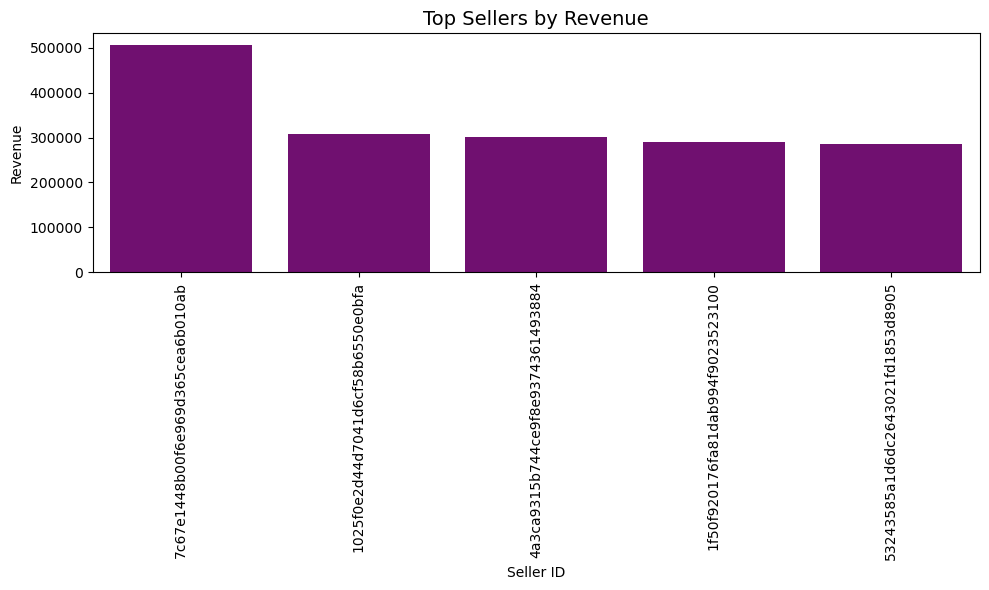

In [36]:
query = """select* ,dense_rank() over (order by revenue desc) as rn from
(select order_items.seller_id,sum(payments.payment_value)

revenue from order_items join payments
on order_items.order_id =payments.order_id
group by order_items.seller_id) as a
"""

cur.execute(query)

data = cur.fetchall()
df= pd.DataFrame(data,columns=['seller_id','revenue','rank'])

df = df.head()

plt.figure(figsize=(10, 6))
sns.barplot(x='seller_id', y='revenue', data=df, color='purple')
plt.title("Top Sellers by Revenue", fontsize=14)
plt.xlabel("Seller ID")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [39]:
query = """select customer_id,order_purchase_timestamp,payment,
avg(payment)over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg


from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id)as a;"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data)
df


,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year.


In [42]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales

In [45]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [48]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

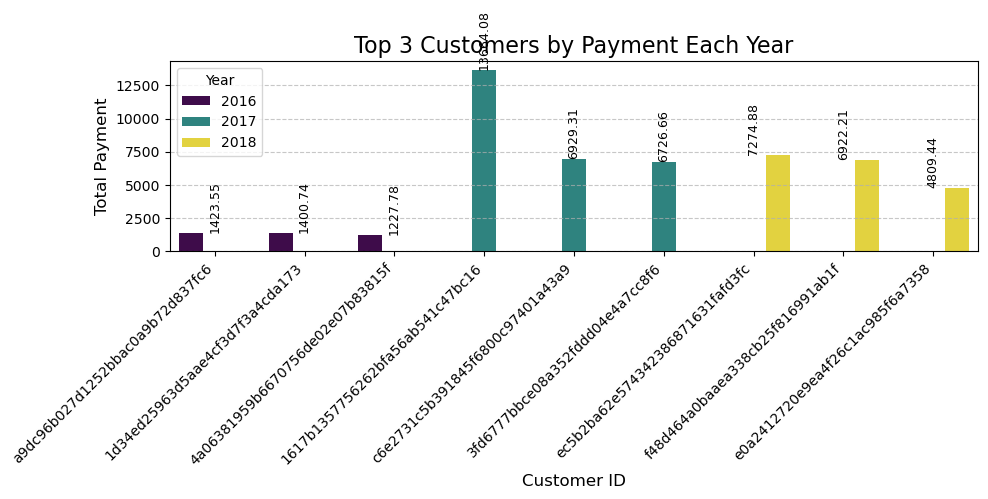

In [50]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
plt.figure(figsize=(10, 5))  # Bigger figure for better visibility

# Barplot with custom palette and no dodge so bars are stacked by year
sns.barplot(x="id", y="payment", hue="years", data=df, palette="viridis", dodge=True)

# Add text labels on bars
for index, row in df.iterrows():
    plt.text(
        x=index,
        y=row['payment'] + 10,  # slightly above the bar
        s=f"{row['payment']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        rotation=90
    )

plt.title("Top 3 Customers by Payment Each Year", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Payment", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Year")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()